# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Farah Syahfira
- **Email:** farahsyahfira@gmail.com
- **ID Dicoding:** farahsyahfira

## Menentukan Pertanyaan Bisnis

- Bagaimana rata-rata jumlah penyewaan sepeda harian berdasarkan cuaca  ?
- Bagaimana rata-rata jumlah penyewaan sepeda harian berdasarkan hari kerja maupun non kerja?
- Bagaimana perbandingan tren penyewaan sepeda bulanan pada tahun 2011 dan 2012?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
bike_day = pd.read_csv("https://raw.githubusercontent.com/farrayaa/Bike-Sharing/refs/heads/main/day.csv")
bike_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
bike_hour = pd.read_csv("https://raw.githubusercontent.com/farrayaa/Bike-Sharing/refs/heads/main/hour.csv")
bike_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

#### Bike Daily Rent

cek informasi data

In [4]:
bike_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


cek missing value

In [5]:
bike_day.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

cek data duplikat

In [6]:
print("Jumlah duplikasi: ", bike_day.duplicated().sum())

Jumlah duplikasi:  0


#### Bike Hourly Rent

cek informasi data

In [7]:
bike_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


cek missing value

In [8]:
bike_hour.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

cek data duplikat

In [9]:
print("Jumlah duplikasi: ", bike_hour.duplicated().sum())

Jumlah duplikasi:  0


**Insight:**
- Pada data persewaan sepeda harian terdapat 731 data observasi yang terdiri dari 15 variabel (+ variabel instan yang tidak akan digunakan dalam analisis kali ini), tidak terdapat missing value, dan tidak terdapat data duplikat.
- Pada data persewaan sepeda per jam terdapat 17379 data observasi yang terdiri dari 15 variabel (+ variabel instan yang tidak akan digunakan dalam analisis kali ini), tidak terdapat missing value, dan tidak terdapat data duplikat

### Cleaning Data

Menghapus kolom yang tidak digunakan

In [10]:
bike_day.drop(['instant'], axis=1,inplace=True)
bike_hour.drop(['instant'], axis=1,inplace=True)

**Insight:**
- pada data terdapat variabel instant yang hanya merupakan indeks observasi, sehingga dikeluarkan
- baik data penyewaan secara harian maupun per jam sudah bersih (tidak terdapat missing value dan data duplikat ) sehingga tidak dilakukan cleaning data yang lain

## Exploratory Data Analysis (EDA)

### Explore Descriptive Statistics

In [11]:
bike_day.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [12]:
bike_day.describe(include="object")

,dteday
count,731
unique,731
top,2011-01-01
freq,1


In [13]:
bike_hour.describe()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [14]:
bike_day.describe(include='object')

,dteday
count,731
unique,731
top,2011-01-01
freq,1


**Insight:**
- hasil statistik deskriptif untuk variabel numerik dan kategorik seperti yang tertera pada output dimana rata-rata penyewaan harian sebesar 4504, sedangkan rata-rata jumlah penyewaan per jam sebesar 189

## Analisis dilakukan menggunakan data daily bike rental (Penyewaan sepeda harian)

### Eksplore Average on Count Daily Rental Bikes Based on Weathersit

In [15]:
weather = {
    1: "Clear",
    2: "Mist",
    3: "Light Rain",
    4: "Heavy Rain"
}
bike_day["weather"] = bike_day["weathersit"].map(weather)
bike_day.groupby("weather")["cnt"].mean().reset_index()

,weather,cnt
0,Clear,4876.786177
1,Light Rain,1803.285714
2,Mist,4035.862348


### Eksplore Average on Count Daily Rental Bikes Based on Working day

In [16]:
workday = {
    0: "Workday",
    1: "Non-Workday"
}
bike_day["workday"] = bike_day["workingday"].map(workday)
bike_day.groupby("workday")["cnt"].mean().reset_index()

,workday,cnt
0,Non-Workday,4584.820000
1,Workday,4330.168831


### Eksplore Monthly Rental Bikes in 2011 adn 2012

In [17]:
# Filter data 2011 dan 2012
bike_2011 = bike_day[bike_day['yr'] == 0]  # Data 2011
bike_2012 = bike_day[bike_day['yr'] == 1]  # Data 2012

# kelompokkan jumlah penyewaan berdasarkan bulan 
bike_series_2011 = bike_2011.groupby("mnth")["cnt"].sum().reset_index()
bike_series_2012 = bike_2012.groupby("mnth")["cnt"].sum().reset_index()
combined_bike_data = pd.merge(bike_series_2011, bike_series_2012, on="mnth", suffixes=('_2011', '_2012'))
combined_bike_data[['mnth', 'cnt_2011', 'cnt_2012']]

,mnth,cnt_2011,cnt_2012
0,1,38189,96744
1,2,48215,103137
2,3,64045,164875
3,4,94870,174224
4,5,135821,195865
5,6,143512,202830
6,7,141341,203607
7,8,136691,214503
8,9,127418,218573
9,10,123511,198841


## Visualization & Explanatory Analysis

### Pertanyaan 1:

Bagaimana rata-rata jumlah penyewaan sepeda harian berdasarkan cuaca  ?

C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_27816\1019460787.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weather', y='cnt', data=avg_rentals_by_weather, palette='Blues')


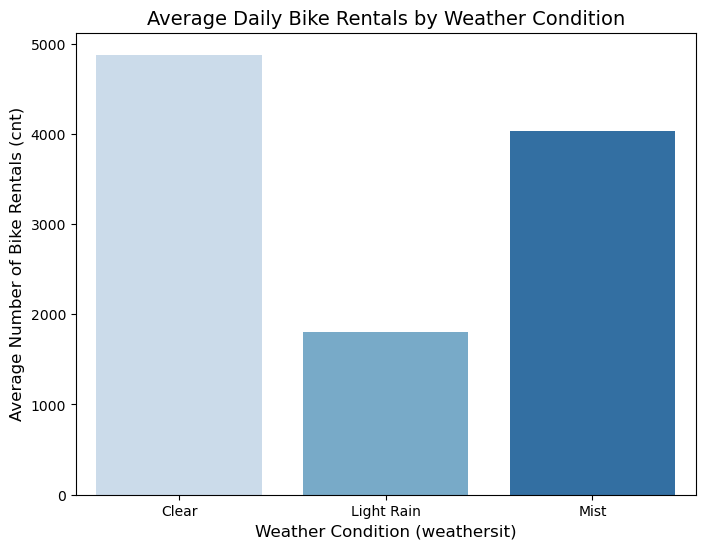

In [18]:
# Menghitung rata-rata jumlah penyewaan sepeda harian berdasarkan cuaca
avg_rentals_by_weather = bike_day.groupby('weather')['cnt'].mean().reset_index()

# Membuat bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='weather', y='cnt', data=avg_rentals_by_weather, palette='Blues')
plt.title('Average Daily Bike Rentals by Weather Condition', fontsize=14)
plt.xlabel('Weather Condition (weathersit)', fontsize=12)
plt.ylabel('Average Number of Bike Rentals (cnt)', fontsize=12)
plt.show()

### Pertanyaan 2:

Bagaimana rata-rata jumlah penyewaan sepeda harian berdasarkan hari kerja maupun nonkerja?

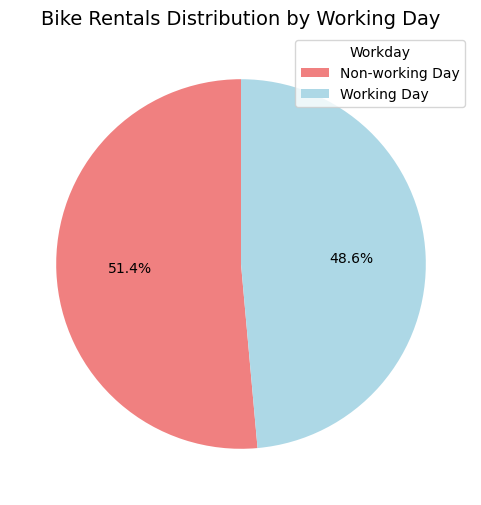

In [19]:
# Menghitung jumlah penyewaan sepeda harian berdasarkan workday
rentals_by_workday = bike_day.groupby('workday')['cnt'].mean().reset_index()

# Membuat pie chart
plt.figure(figsize=(6, 6))
plt.pie(rentals_by_workday['cnt'], autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightblue'])
plt.title('Bike Rentals Distribution by Working Day', fontsize=14)
labels = ['Non-working Day', 'Working Day'] 
plt.legend(labels=labels, title="Workday", loc="best")
plt.show()

### Pertanyaan 3:

Bagaimana perbandingan tren penyewaan sepeda bulanan pada tahun 2011 dan 2012?

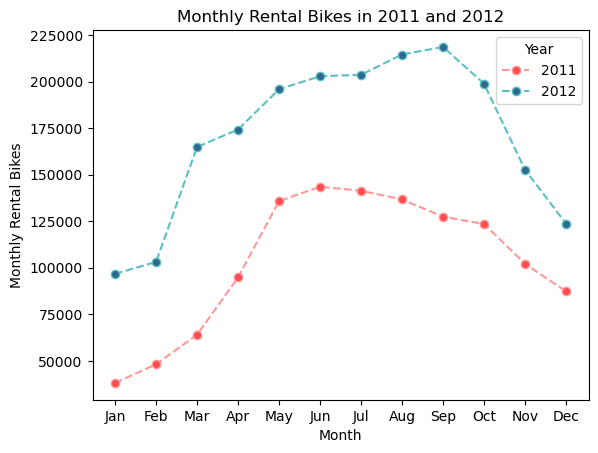

In [20]:
# Filter data untuk tahun 2011 and 2012
bike_2011 = bike_day[bike_day['yr'] == 0]  # 2011
bike_2012 = bike_day[bike_day['yr'] == 1]  # 2012

# mengelompokkan berdasarkan bulan dan jumlah penyewaan
bike_series_2011 = bike_2011.groupby("mnth")["cnt"].sum().reset_index()
bike_series_2012 = bike_2012.groupby("mnth")["cnt"].sum().reset_index()

# variabel x dan y
x_2011 = bike_series_2011.mnth
y_2011 = bike_series_2011.cnt
x_2012 = bike_series_2012.mnth
y_2012 = bike_series_2012.cnt

# Membuat Line Plot
fig, ax = plt.subplots()
ax.plot(x_2011, y_2011, color="#FF9999", marker='o', markerfacecolor='#FF4D4D', linestyle='dashed', label='2011')
ax.plot(x_2012, y_2012, color="#5CC0C0", marker='o', markerfacecolor='#2F6790', linestyle='dashed', label='2012')
ax.set_xlabel("Month")
ax.set_ylabel("Monthly Rental Bikes")
ax.set_title("Monthly Rental Bikes in 2011 and 2012")
ax.set_xticks([1,2,3,4,5,6,7,8,9,10,11,12])
ax.set_xticklabels(("Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"))
ax.legend(title="Year")
plt.show()

## Conclusion

### Pertanyaan 1: Bagaimana rata-rata jumlah penyewaan sepeda harian berdasarkan cuaca ?

- Cuaca cerah (Clear) memiliki rata-rata penyewaan tertinggi, yaitu 4876.79 penyewaan per hari. Ini menunjukkan bahwa kondisi cuaca yang baik mendorong lebih banyak orang untuk beraktivitas di luar ruangan dan menyewa sepeda.
- Pada kondisi kabut (Mist), rata-rata penyewaan sepeda adalah 4035.86, sedikit lebih rendah dari cuaca cerah. Kabut ringan tidak menghalangi aktivitas bersepeda secara signifikan, sehingga masih ada jumlah penyewaan yang cukup tinggi.
- Saat hujan ringan (Light Rain), rata-rata penyewaan sepeda turun drastis menjadi 1803.29. Ini menunjukkan bahwa meskipun hujan ringan tidak sepenuhnya menghentikan aktivitas, orang cenderung lebih jarang menyewa sepeda dalam kondisi ini.
- Hujan Lebat Berpotensi Membuat Penyewaan Sepeda Sangat Rendah. Meskipun data tentang hujan lebat belum tercatat, berdasarkan tren yang ada, kemungkinan besar jumlah penyewaan sepeda pada kondisi hujan lebat akan sangat rendah atau mendekati nol, karena cuaca buruk menghalangi aktivitas di luar ruangan.
- Berdasarkan eksplorasi dan visualisasi data yang telah dilakukan, cuaca cerah (Clear) memiliki rata-rata jumlah penyewaan sepeda harian tertinggi, sedangkan hujan ringan (Light Rain) dan kondisi yang lebih buruk secara signifikan menurunkan jumlah penyewaan. 
- Sehingga, Cuaca yang lebih baik mendorong lebih banyak orang untuk menyewa sepeda, sedangkan cuaca buruk menghambat aktivitas tersebut.

### Pertanyaan 2: Bagaimana rata-rata jumlah penyewaan sepeda harian berdasarkan hari kerja maupun non kerja?

- Pada hari Non-Kerja (Non-Workday) rata-rata penyewaan adalah 4584.82 (51.4%), sedikit lebih tinggi dibandingkan hari kerja, menunjukkan bahwa lebih banyak orang mungkin menyewa sepeda untuk rekreasi atau aktivitas santai saat hari libur atau akhir pekan.
- Pada hari Kerja (Workday) rata-rata penyewaan adalah 4330.17 (48.6%), meskipun sedikit lebih rendah, masih cukup banyak orang yang menyewa sepeda pada hari kerja.
- Sehingga, meskipun terdapat perbedaan, penyewaan sepeda tetap signifikan pada hari kerja dan non-kerja, dengan sedikit peningkatan pada hari non-kerja yang kemungkinan diakibatkan karena lebih banyak waktu luang.

### Pertanyaan 3: Bagaimana perbandingan tren penyewaan sepeda bulanan pada tahun 2011 dan 2012?

- Berdasarkan eksplorasi dan visualisasi data, tahun 2012 memiliki penyewaan lebih tinggi sepanjang tahun dibandingkan 2011, dengan puncaknya pada bulan Juli-September, mencapai lebih dari 200.000 penyewaan per bulan.
- Pola musiman yang mirip terlihat di kedua tahun, di mana penyewaan meningkat pada awal tahun, lalu menurun tajam setelah bulan September.

### Analisis Tambahan (Clustering)

### Manual Grouping

In [21]:
# Pengelompokan manual berdasarkan 'season' dan 'weathersit'
# Tentukan label untuk musim
season_labels = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
bike_day['season_group'] = bike_day['season'].map(season_labels)

# Tentukan label untuk situasi cuaca
weathersit_labels = {1: 'Clear', 2: 'Mist', 3: 'Light Snow', 4: 'Heavy Rain'}
bike_day['weather_group'] = bike_day['weathersit'].map(weathersit_labels)

# Mengelompokkan berdasarkan 'season_group' dan 'weather_group'
grouped_data = bike_day.groupby(['season_group', 'weather_group'])['cnt'].mean().reset_index()
grouped_data


,season_group,weather_group,cnt
0,Fall,Clear,5878.257353
1,Fall,Light Snow,2751.750000
2,Fall,Mist,5222.479167
3,Spring,Clear,2811.135135
4,Spring,Light Snow,934.750000
5,Spring,Mist,2357.166667
6,Summer,Clear,5548.548673
7,Summer,Light Snow,1169.000000
8,Summer,Mist,4236.705882
9,Winter,Clear,5043.563107


- Dilakukan clustering dengan manual grouping untuk mengelompokkan jumlah penyewaan sepeda pada saat konsdisi cuaca tertentu ( weathersit) berdasarkan season (1:spring, 2:summer, 3:fall, 4:winter)
- Jumlah penyewaan sepeda cenderung paling tinggi pada kondisi cuaca cerah, terutama di musim gugur dengan 5878,26 penyewaan dan musim panas dengan 5548,55 penyewaan. Kabut tidak terlalu mempengaruhi minat penyewaan, kecuali di musim semi, di mana terjadi penurunan signifikan menjadi 2357,17. Sementara itu, salju ringan secara konsisten menurunkan jumlah penyewaan sepeda di setiap musim, dengan dampak terbesar terlihat pada musim semi yang hanya mencapai 934,75 dan musim panas yang menurun menjadi 1169. Musim panas dan musim gugur tetap menjadi musim paling populer untuk penyewaan sepeda, sedangkan penyewaan lebih sedikit terjadi di musim semi dan musim dingin dengan angka tertinggi di musim dingin mencapai 5043,56 pada kondisi cerah.
- Sehingga dapat disimpulkan bahwa cuaca cerah merupakan kondisi yang paling mendukung peningkatan penyewaan sepeda, terutama di musim panas dan gugur. Sebaliknya, salju ringan cenderung mengurangi minat penyewaan secara signifikan di setiap musim, dengan dampak terbesar di musim semi dan musim panas. Meskipun kabut sedikit memengaruhi penyewaan, dampaknya tidak sebesar salju ringan. Secara keseluruhan, musim panas dan gugur adalah waktu yang paling populer untuk menyewa sepeda, sementara musim semi dan musim dingin cenderung memiliki permintaan yang lebih rendah.

### Binning

In [22]:
# Binning (mengelompokkan) kolom 'temp' ke dalam kategori: Dingin, Sedang, Panas
bike_day['temp_bin'] = pd.cut(bike_day['temp'], bins=[0, 0.3, 0.6, 1], labels=['Dingin', 'Sedang', 'Panas'])

# Binning (mengelompokkan) kolom 'cnt' ke dalam kategori: Rendah, Sedang, Tinggi
bike_day['cnt_bin'] = pd.cut(bike_day['cnt'], bins=[0, 2000, 4000, 10000], labels=['Rendah', 'Sedang', 'Tinggi'])

# Mengelompokkan berdasarkan 'temp_bin' dan 'cnt_bin'
binned_data = bike_day.groupby(['temp_bin', 'cnt_bin']).size().reset_index(name='count')
binned_data

C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_27816\1593903118.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_data = bike_day.groupby(['temp_bin', 'cnt_bin']).size().reset_index(name='count')


,temp_bin,cnt_bin,count
0,Dingin,Rendah,69
1,Dingin,Sedang,53
2,Dingin,Tinggi,13
3,Sedang,Rendah,27
4,Sedang,Sedang,107
5,Sedang,Tinggi,208
6,Panas,Rendah,2
7,Panas,Sedang,21
8,Panas,Tinggi,231


- Dilakukan binning untuk mengelompokkan temperatur dan jumlah penyewaan sepeda ke dalam beberapa kategori berdasaekan value variabel tersebut, dimana untuk temperatur 0-0.3: dingin, 0.3-0.6: sedang, dan 0.6-1 : panas, sedangkan untuk jumlah penyewaan dilekompokkan menjadi 0-2000 : rendah, 2000-4000: sedang, 4000-10.000 : tinggi.
- Penyewaan sepeda meningkat seiring kenaikan suhu. Pada suhu dingin, penyewaan didominasi oleh kategori rendah dan sedang, sedangkan pada suhu panas, mayoritas berada di kategori tinggi (231 penyewaan). Ini menunjukkan bahwa semakin hangat suhu, semakin banyak sepeda yang disewa.